In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('ratings.csv')

In [5]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
movie_title = pd.read_csv('movies.csv')

In [7]:
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df = pd.merge(df,movie_title,on='movieId')

In [9]:
df.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
 df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Still Bill (2009)                                  5.0
Nameless Gangster (Bumchoiwaui junjaeng) (2012)    5.0
Szamanka (1996)                                    5.0
Keith (2008)                                       5.0
Kiler (1997)                                       5.0
Killing of Sister George, The (1968)               5.0
My Girlfriend's Boyfriend (2010)                   5.0
Ruby & Quentin (Tais-toi!) (2003)                  5.0
Kiss Them for Me (1957)                            5.0
Too Much Sleep (1997)                              5.0
Name: rating, dtype: float64

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
Name: rating, dtype: int64

In [12]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
rating.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.875
$5 a Day (2008),3.300
'71 (2014),3.000
'Hellboy': The Seeds of Creation (2004),3.125
'Neath the Arizona Skies (1934),3.500


In [14]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
rating.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


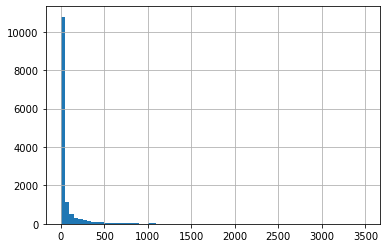

In [16]:
 rating['num of ratings'].hist(bins=70)

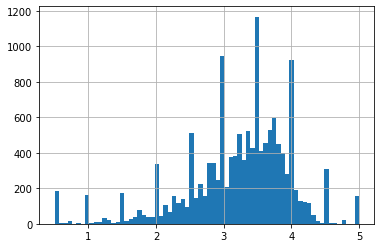

In [17]:
rating['rating'].hist(bins=70)

In [18]:
import seaborn as sns

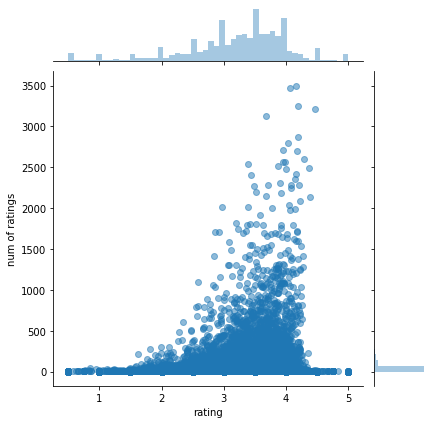

In [19]:
sns.jointplot(x='rating',y='num of ratings',data=rating,alpha=0.5)

In [20]:
moviemat = pd.pivot_table(df,index='userId',columns='title',values='rating')

In [21]:
moviemat.head()

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rating.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129
Star Wars: Episode IV - A New Hope (1977),4.189457,2874
Braveheart (1995),4.038228,2799
Terminator 2: Judgment Day (1991),3.948359,2711
"Matrix, The (1999)",4.176340,2705


In [23]:
pulp_fiction_user_rating = moviemat['Pulp Fiction (1994)']
jurassic_park_user_rating = moviemat['Jurassic Park (1993)']

In [24]:
pulp_fiction_user_rating.head(5)

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [25]:
similar_to_pulp_fiction = moviemat.corrwith(pulp_fiction_user_rating)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
similar_to_jurassic_part = moviemat.corrwith(jurassic_park_user_rating)

In [27]:
corr_pulp_fiction = pd.DataFrame(similar_to_pulp_fiction,columns=['Correlation'])
corr_pulp_fiction.dropna(inplace=True)

In [28]:
corr_pulp_fiction.head()

,Correlation
title,
'Round Midnight (1986),0.833333
'Salem's Lot (2004),0.683130
'Til There Was You (1997),-0.072479
"'burbs, The (1989)",-0.071418
(500) Days of Summer (2009),0.066468


In [29]:
corr_pulp_fiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Hired Hand, The (1971)",1.0
Shuttle (2008),1.0
"Children of Huang Shi, The (2008)",1.0
Lost Boys: The Thirst (2010),1.0
"Lost Embrace (Abrazo partido, El) (2004)",1.0
Louis C.K.: Live at The Comedy Store (2015),1.0
Love in the Time of Cholera (2007),1.0
"Simple-Minded Murder, The (Enfaldige mördaren, Den) (1982)",1.0
"Lower Depths, The (Donzoko) (1957)",1.0


In [30]:
corr_pulp_fiction = corr_pulp_fiction.join(rating['num of ratings'])

In [31]:
corr_pulp_fiction.sort_values('num of ratings',ascending=False).head(10)

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,3498
Forrest Gump (1994),0.093449,3476
"Silence of the Lambs, The (1991)",0.264617,3247
"Shawshank Redemption, The (1994)",0.159302,3216
Jurassic Park (1993),0.050072,3129
Star Wars: Episode IV - A New Hope (1977),0.117558,2874
Braveheart (1995),0.106524,2799
Terminator 2: Judgment Day (1991),0.188311,2711
"Matrix, The (1999)",0.222975,2705


In [32]:
corr_pulp_fiction[corr_pulp_fiction['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,3498
Reservoir Dogs (1992),0.535822,1414
Kill Bill: Vol. 2 (2004),0.399329,1006
Sexy Beast (2000),0.391804,120
Django Unchained (2012),0.389830,220
Moonrise Kingdom (2012),0.384164,113
House of Sand and Fog (2003),0.381831,117
Fight Club (1999),0.380831,2085
"Girl with the Dragon Tattoo, The (Män som hatar kvinnor) (2009)",0.378303,162


In [33]:
corr_jurassic_park = pd.DataFrame(similar_to_jurassic_part,columns=['Correlation'])
corr_jurassic_park.dropna(inplace=True)

In [34]:
corr_jurassic_park

,Correlation
title,
'Hellboy': The Seeds of Creation (2004),0.944911
'Round Midnight (1986),-0.944911
'Salem's Lot (2004),-0.596040
'Til There Was You (1997),0.395523
"'burbs, The (1989)",0.147519
...,...
loudQUIETloud: A Film About the Pixies (2006),-0.140028
xXx (2002),0.247047
xXx: State of the Union (2005),0.485957


In [35]:
corr_jurassic_park.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Sarah, Plain and Tall (1991)",1.0
Floating Weeds (Ukigusa) (1959),1.0
Roberta (1935),1.0
Fail Safe (2000),1.0
Rio 2 (2014),1.0
Rhapsody in August (Hachi-gatsu no kyôshikyoku) (1991),1.0
Rent-a-Kid (1995),1.0
Blame It on the Bellboy (1992),1.0
Regret to Inform (1998),1.0


In [36]:
corr_jurassic_park = corr_jurassic_park.join(rating['num of ratings'])

In [37]:
corr_jurassic_park.sort_values('num of ratings',ascending=False).head(10)

,Correlation,num of ratings
title,,
Pulp Fiction (1994),0.050072,3498
Forrest Gump (1994),0.348343,3476
"Silence of the Lambs, The (1991)",0.258818,3247
"Shawshank Redemption, The (1994)",0.225821,3216
Jurassic Park (1993),1.000000,3129
Star Wars: Episode IV - A New Hope (1977),0.333960,2874
Braveheart (1995),0.360413,2799
Terminator 2: Judgment Day (1991),0.381143,2711
"Matrix, The (1999)",0.298891,2705


In [38]:
corr_jurassic_park[corr_jurassic_park['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,3129
"Lost World: Jurassic Park, The (1997)",0.610219,779
"Mist, The (2007)",0.509456,102
Flashdance (1983),0.508246,185
Child's Play (1988),0.491470,134
Twister (1996),0.489519,1740
Independence Day (a.k.a. ID4) (1996),0.479049,2546
Jurassic Park III (2001),0.472196,330
Harry and the Hendersons (1987),0.462035,101


In [41]:
rating.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


In [42]:
rating['log review count'] = np.log10(rating['num of ratings']+1)

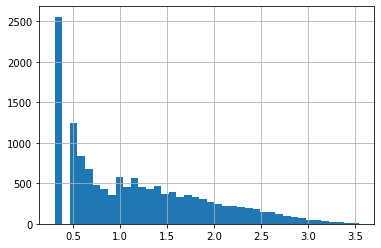

In [71]:
rating['log review count'].hist(bins=40)

In [59]:
from scipy.stats import boxcox
bct = boxcox(rating['num of ratings'],lmbda=0)

In [61]:
rc_bc,bc_param = boxcox(rating['num of ratings'])

In [65]:
rating['rc_bc'] = rc_bc

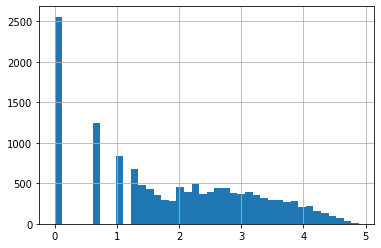

In [70]:
rating['rc_bc'].hist(bins=40)

In [76]:
rating.head()

,rating,num of ratings,log review count,rc_bc,minmax
title,,,,,
"""Great Performances"" Cats (1998)",2.875,8,0.954243,1.807613,0.002002
$5 a Day (2008),3.300,5,0.778151,1.443192,0.001144
'71 (2014),3.000,1,0.301030,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),3.125,4,0.698970,1.261722,0.000858
'Neath the Arizona Skies (1934),3.500,2,0.477121,0.661019,0.000286


Text(0.5, 1.0, 'Probplot after Box-Cox transform')

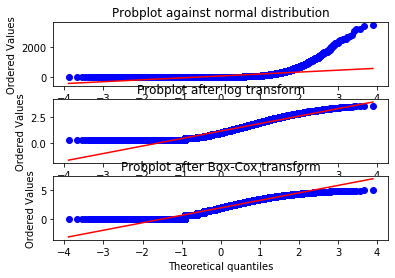

In [73]:
from scipy import stats
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(rating['num of ratings'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')


prob2 = stats.probplot(rating['log review count'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')


prob3 = stats.probplot(rating['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')


In [74]:
import sklearn.preprocessing as prep

In [75]:
rating['minmax'] = prep.minmax_scale(rating['num of ratings'])

In [81]:
rating['standardization'] = prep.StandardScaler().fit_transform(rating[['num of ratings']])

In [85]:
rating.head()

,rating,num of ratings,log review count,rc_bc,minmax,standardization,l2 norm
title,,,,,,,
"""Great Performances"" Cats (1998)",2.875,8,0.954243,1.807613,0.002002,-0.306052,1.0
$5 a Day (2008),3.300,5,0.778151,1.443192,0.001144,-0.319800,1.0
'71 (2014),3.000,1,0.301030,0.000000,0.000000,-0.338130,1.0
'Hellboy': The Seeds of Creation (2004),3.125,4,0.698970,1.261722,0.000858,-0.324383,1.0
'Neath the Arizona Skies (1934),3.500,2,0.477121,0.661019,0.000286,-0.333548,1.0


In [84]:
rating['l2 norm'] = prep.normalize(rating[['num of ratings']])

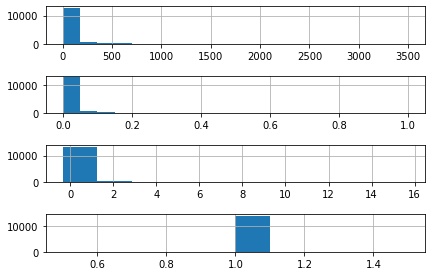

In [92]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.tight_layout()

rating['num of ratings'].hist(ax=ax1,bins=20)
ax1.set_xlabel('')

rating['minmax'].hist(ax=ax2,bins=20)

rating['standardization'].hist(ax=ax3,bins=10)

rating['l2 norm'].hist(ax=ax4,bins=10)

In [2]:
import matplotlib.pyplot as plt
import numpy as np


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


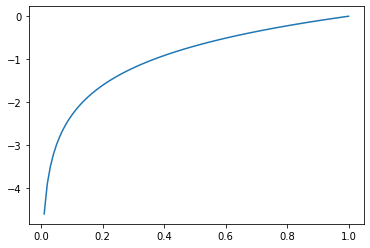

In [16]:
X = np.linspace(0,1,101)
plt.plot(X, np.log(X))
plt.show()

In [ ]:
# A DFS function 
    def DFS(self, v, visited): 
  
        # Mark the current node as visited  and print
        visited[v] = True
        print(v, end = ' ') 
  
        # do same for all the vertices  
        # and adjacent to that vertex 
        for i in self.graph[v]: 
            if visited[i] == False: 
                self.DFS(i, visited) 
  
    # function for  DFS traversal. 
    # by recursive DFSU() 
    def DFS(self, v): 
  
        # Mark all the vertices as not visited 
        visited = [False] * (len(self.graph)) 
  
        # Call the recursive  function  
        # to print DFS traversal 
        self.DFSU(v, visited) 

# A BFS function
def BFS(self, s): 
  
        # Mark all the vertices as not visited 
        visited = [False] * (len(self.graph)) 
  
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as  
        # visited and enqueue it 
        queue.append(s) 
        visited[s] = True
  
        while queue: 
  
            # Dequeue a vertex from  
            # queue and print it 
            s = queue.pop(0) 
            print (s, end = " ") 
  # get all adjacent dequed vertwx and after visiting enqueue and mark visited
            for i in self.graph[s]: 
                if visited[i] == False: 
                    queue.append(i) 
                    visited[i] = True